### ДЗ Бернатович 15.01.2023

#### Построение ассоциативных правил для датасета




In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

In [2]:
dataset=pd.read_csv("dataset.csv")

In [3]:
dataset.columns=[i for i in range(1,15)]
display(dataset.head())

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,shampoo,hand soap,waffles,vegetables,cheeses,mixes,milk,sandwich bags,laundry detergent,dishwashing liquid/detergent,waffles,individual meals,hand soap,vegetables
1,pork,soap,ice cream,toilet paper,dinner rolls,hand soap,spaghetti sauce,milk,ketchup,sandwich loaves,poultry,toilet paper,ice cream,ketchup
2,juice,lunch meat,soda,toilet paper,all- purpose,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pasta,tortillas,mixes,hand soap,toilet paper,vegetables,vegetables,paper towels,vegetables,flour,vegetables,pork,poultry,eggs
4,toilet paper,eggs,toilet paper,vegetables,bagels,dishwashing liquid/detergent,cereals,paper towels,laundry detergent,butter,cereals,bagels,paper towels,shampoo


In [4]:
dataset.shape

(1498, 14)

In [5]:
dataset = dataset.fillna('')

In [6]:
display(dataset.head())

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,shampoo,hand soap,waffles,vegetables,cheeses,mixes,milk,sandwich bags,laundry detergent,dishwashing liquid/detergent,waffles,individual meals,hand soap,vegetables
1,pork,soap,ice cream,toilet paper,dinner rolls,hand soap,spaghetti sauce,milk,ketchup,sandwich loaves,poultry,toilet paper,ice cream,ketchup
2,juice,lunch meat,soda,toilet paper,all- purpose,,,,,,,,,
3,pasta,tortillas,mixes,hand soap,toilet paper,vegetables,vegetables,paper towels,vegetables,flour,vegetables,pork,poultry,eggs
4,toilet paper,eggs,toilet paper,vegetables,bagels,dishwashing liquid/detergent,cereals,paper towels,laundry detergent,butter,cereals,bagels,paper towels,shampoo


In [7]:
transactions = []
for i in range(0, 1498):
    transactions.append([str(dataset.values[i,j]) for j in range(0,14) if len(str(dataset.values[i,j]))>2])

In [8]:
transactions

[[' shampoo',
  ' hand soap',
  ' waffles',
  ' vegetables',
  ' cheeses',
  ' mixes',
  ' milk',
  ' sandwich bags',
  ' laundry detergent',
  ' dishwashing liquid/detergent',
  ' waffles',
  ' individual meals',
  ' hand soap',
  ' vegetables'],
 [' pork',
  ' soap',
  ' ice cream',
  ' toilet paper',
  ' dinner rolls',
  ' hand soap',
  ' spaghetti sauce',
  ' milk',
  ' ketchup',
  ' sandwich loaves',
  ' poultry',
  ' toilet paper',
  ' ice cream',
  ' ketchup'],
 [' juice', ' lunch meat', ' soda', ' toilet paper', ' all- purpose'],
 [' pasta',
  ' tortillas',
  ' mixes',
  ' hand soap',
  ' toilet paper',
  ' vegetables',
  ' vegetables',
  ' paper towels',
  ' vegetables',
  ' flour',
  ' vegetables',
  ' pork',
  ' poultry',
  ' eggs'],
 [' toilet paper',
  ' eggs',
  ' toilet paper',
  ' vegetables',
  ' bagels',
  ' dishwashing liquid/detergent',
  ' cereals',
  ' paper towels',
  ' laundry detergent',
  ' butter',
  ' cereals',
  ' bagels',
  ' paper towels',
  ' shampoo'],


#### Apriori 

In [9]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [10]:
encoder = TransactionEncoder()
transactions_b= pd.DataFrame(encoder.fit(transactions).transform(transactions), columns=encoder.columns_)
display(transactions_b.head())

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,False,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,True,False,True,False,True,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
4,False,False,True,False,True,True,False,False,False,True,...,True,False,False,False,False,True,False,True,False,False


In [11]:
transactions_b

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,False,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,True,False,True,False,True,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
4,False,False,True,False,True,True,False,False,False,True,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,True,False,False,True,False,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,False
1494,False,False,False,False,False,True,True,False,True,False,...,False,True,False,True,False,False,False,True,False,False
1495,False,False,False,True,False,False,False,False,False,True,...,True,False,False,False,True,False,True,True,False,False
1496,True,False,False,True,False,False,True,False,False,False,...,False,True,False,True,True,True,False,False,True,True


In [12]:
transactions_b.shape

(1498, 38)

Алгоритм Apriori будет использоваться для генерации частых наборов элементов. Мы зададим минимальную поддержку 0.001. Генерируются правила ассоциаций, и мы отфильтровываем значения Lift > 1.

In [13]:
%%time
frequent_itemsets = apriori(transactions_b, min_support= 0.001, use_colnames=True, max_len =2)
rules = association_rules(frequent_itemsets, metric="lift",  min_threshold = 1)
display(rules.head(20))
print("Rules identified: ", len(rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( all- purpose),( bagels),0.263017,0.278371,0.075434,0.286802,1.030286,0.002217,1.011821
1,( bagels),( all- purpose),0.278371,0.263017,0.075434,0.270983,1.030286,0.002217,1.010927
2,( all- purpose),( dishwashing liquid/detergent),0.263017,0.268358,0.074099,0.281726,1.049814,0.003516,1.018611
3,( dishwashing liquid/detergent),( all- purpose),0.268358,0.263017,0.074099,0.276119,1.049814,0.003516,1.018100
4,( all- purpose),( eggs),0.263017,0.269025,0.071429,0.271574,1.009472,0.000670,1.003498
5,( eggs),( all- purpose),0.269025,0.263017,0.071429,0.265509,1.009472,0.000670,1.003392
6,( all- purpose),( flour),0.263017,0.257009,0.071429,0.271574,1.056668,0.003831,1.019994
7,( flour),( all- purpose),0.257009,0.263017,0.071429,0.277922,1.056668,0.003831,1.020641
8,( all- purpose),( fruits),0.263017,0.263685,0.080774,0.307107,1.164673,0.011421,1.062667
9,( fruits),( all- purpose),0.263685,0.263017,0.080774,0.306329,1.164673,0.011421,1.062438


Rules identified:  656
CPU times: total: 125 ms
Wall time: 150 ms


<>:24: DeprecationWarning: invalid escape sequence \d
<>:24: DeprecationWarning: invalid escape sequence \d
C:\Users\Катя\AppData\Local\Temp\ipykernel_13136\2232728784.py:24: DeprecationWarning: invalid escape sequence \d
  if re.compile("^[R]\d+$").fullmatch(node) != None:


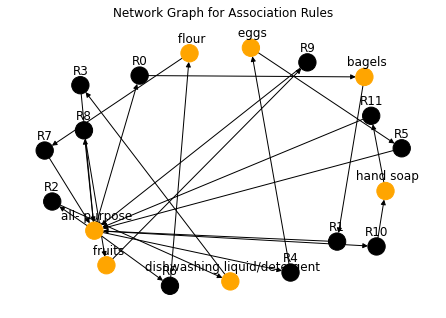

In [14]:
def draw_network(rules, rules_to_show):
  # Ориентированный граф от NetworkX
  network = nx.DiGraph()
  
  # Перебор количества правил для отображения
  for i in range(rules_to_show):
    
    # Добавление узла правила
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']: 
        # Добавление узла-предшественника и ссылки на правило
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)
      
    for consequents in rules.iloc[i]['consequents']:
        # Добавление узла-последователя и ссылки на правило
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

  color_map=[]  
  
  # Для каждого узла, если это правило, цвет черный, в противном случае - оранжевый.
  for node in network:
       if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('black')
       else:
            color_map.append('orange')
  
  # Расположение узлов с помощью spring layout
  pos = nx.spring_layout(network, k=16, scale=1)
  # Построение сетевого графа
  nx.draw(network, pos, node_color = color_map, font_size=8)            
  
  # Сдвиг расположения текста вверх
  for p in pos:  
      pos[p][1] += 0.12

  nx.draw_networkx_labels(network, pos)
  plt.title("Network Graph for Association Rules")
  plt.show()

draw_network(rules, 12)

С чем продается мыло:

In [15]:
soap_rules = rules[rules['consequents'].astype(str).str.contains('soap')]
soap_rules = soap_rules.sort_values(by=['lift'],ascending = [False]).reset_index(drop = True)

display(soap_rules.head(6))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( mixes),( hand soap),0.273698,0.237650,0.076101,0.278049,1.169992,0.011057,1.055957
1,( ketchup),( soap),0.250334,0.265688,0.077437,0.309333,1.164275,0.010926,1.063194
2,( flour),( soap),0.257009,0.265688,0.076769,0.298701,1.124258,0.008485,1.047075
3,( sandwich loaves),( soap),0.248999,0.265688,0.074099,0.297587,1.120064,0.007943,1.045414
4,( sugar),( hand soap),0.267023,0.237650,0.070761,0.265000,1.115084,0.007303,1.037211
5,( cheeses),( soap),0.260347,0.265688,0.076101,0.292308,1.100193,0.006930,1.037615


In [16]:
data = pd.DataFrame(transactions)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,shampoo,hand soap,waffles,vegetables,cheeses,mixes,milk,sandwich bags,laundry detergent,dishwashing liquid/detergent,waffles,individual meals,hand soap,vegetables
1,pork,soap,ice cream,toilet paper,dinner rolls,hand soap,spaghetti sauce,milk,ketchup,sandwich loaves,poultry,toilet paper,ice cream,ketchup
2,juice,lunch meat,soda,toilet paper,all- purpose,None,None,None,None,None,None,None,None,None
3,pasta,tortillas,mixes,hand soap,toilet paper,vegetables,vegetables,paper towels,vegetables,flour,vegetables,pork,poultry,eggs
4,toilet paper,eggs,toilet paper,vegetables,bagels,dishwashing liquid/detergent,cereals,paper towels,laundry detergent,butter,cereals,bagels,paper towels,shampoo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,beef,sandwich bags,hand soap,paper towels,paper towels,all- purpose,beef,fruits,coffee/tea,beef,shampoo,mixes,cheeses,juice
1494,dinner rolls,lunch meat,spaghetti sauce,pasta,vegetables,cereals,dinner rolls,soap,milk,eggs,poultry,cheeses,cereals,mixes
1495,lunch meat,eggs,poultry,vegetables,tortillas,beef,beef,individual meals,dishwashing liquid/detergent,shampoo,dishwashing liquid/detergent,dishwashing liquid/detergent,hand soap,sugar
1496,ketchup,milk,poultry,cheeses,soap,toilet paper,yogurt,beef,waffles,sugar,spaghetti sauce,all- purpose,sandwich bags,toilet paper


#### ECLAT

In [17]:
from pyECLAT import ECLAT

In [18]:
%%time
my_eclat = ECLAT(data=data, verbose=True)
rule_indices, rule_supports = my_eclat.fit(min_support=0.01,
                                           min_combination=1,
                                           max_combination=3,
                                           verbose=True)


100%|████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 1512.93it/s]


Combination 1 by 1


38it [00:00, 73.61it/s]


Combination 2 by 2


703it [00:10, 67.50it/s]


Combination 3 by 3


8436it [02:24, 58.35it/s]

CPU times: total: 2min 32s
Wall time: 2min 36s


In [19]:
my_eclat.df_bin

,aluminum foil,bagels,fruits,paper towels,vegetables,sandwich loaves,waffles,lunch meat,hand soap,dinner rolls,...,pasta,individual meals,dishwashing liquid/detergent,milk,coffee/tea,toilet paper,cheeses,beef,sugar,poultry
0,0,0,0,0,1,0,1,0,1,0,...,0,1,1,1,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,1,1,...,0,0,0,1,0,1,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
4,0,1,0,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,1,0,0
1494,0,0,0,0,1,0,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
1495,0,0,0,0,1,0,0,1,1,0,...,0,1,1,0,0,0,0,1,1,1
1496,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,1,1,1


In [20]:
my_eclat.uniq_

[' aluminum foil',
 ' bagels',
 ' fruits',
 ' paper towels',
 ' vegetables',
 ' sandwich loaves',
 ' waffles',
 ' lunch meat',
 ' hand soap',
 ' dinner rolls',
 ' mixes',
 ' juice',
 ' cereals',
 ' ice cream',
 ' butter',
 ' flour',
 ' yogurt',
 ' shampoo',
 ' soda',
 ' eggs',
 ' ketchup',
 ' sandwich bags',
 ' soap',
 ' laundry detergent',
 ' all- purpose',
 None,
 ' spaghetti sauce',
 ' pork',
 ' tortillas',
 ' pasta',
 ' individual meals',
 ' dishwashing liquid/detergent',
 ' milk',
 ' coffee/tea',
 ' toilet paper',
 ' cheeses',
 ' beef',
 ' sugar',
 ' poultry']

In [21]:
rule_supports

{' aluminum foil': 0.2636849132176235,
 ' bagels': 0.27837116154873165,
 ' fruits': 0.2636849132176235,
 ' paper towels': 0.25500667556742324,
 ' vegetables': 0.5967957276368492,
 ' sandwich loaves': 0.24899866488651534,
 ' waffles': 0.27903871829105475,
 ' lunch meat': 0.2757009345794392,
 ' hand soap': 0.2376502002670227,
 ' dinner rolls': 0.2583444592790387,
 ' mixes': 0.27369826435246997,
 ' juice': 0.2576769025367156,
 ' cereals': 0.27369826435246997,
 ' ice cream': 0.2750333778371162,
 ' butter': 0.26101468624833113,
 ' flour': 0.2570093457943925,
 ' yogurt': 0.2683578104138852,
 ' shampoo': 0.24766355140186916,
 ' soda': 0.27369826435246997,
 ' eggs': 0.2690253671562083,
 ' ketchup': 0.25033377837116155,
 ' sandwich bags': 0.24966622162883845,
 ' soap': 0.2656875834445928,
 ' laundry detergent': 0.2643524699599466,
 ' all- purpose': 0.2630173564753004,
 ' spaghetti sauce': 0.25433911882510013,
 ' pork': 0.24966622162883845,
 ' tortillas': 0.24432576769025366,
 ' pasta': 0.271695

In [22]:
rule_indices

{' aluminum foil': [11,
  13,
  17,
  18,
  21,
  24,
  30,
  36,
  40,
  42,
  47,
  48,
  49,
  52,
  56,
  58,
  61,
  71,
  79,
  82,
  83,
  87,
  88,
  96,
  97,
  104,
  110,
  119,
  126,
  128,
  129,
  135,
  136,
  139,
  142,
  143,
  148,
  151,
  152,
  164,
  167,
  175,
  180,
  181,
  183,
  184,
  185,
  186,
  196,
  197,
  198,
  203,
  205,
  208,
  209,
  220,
  224,
  236,
  241,
  242,
  244,
  251,
  253,
  257,
  260,
  263,
  267,
  268,
  278,
  280,
  282,
  303,
  313,
  315,
  322,
  323,
  324,
  325,
  326,
  335,
  336,
  344,
  352,
  357,
  359,
  360,
  364,
  381,
  382,
  383,
  384,
  388,
  390,
  391,
  392,
  397,
  398,
  399,
  403,
  405,
  409,
  415,
  420,
  422,
  424,
  433,
  438,
  442,
  444,
  447,
  448,
  459,
  461,
  462,
  467,
  468,
  471,
  472,
  473,
  474,
  476,
  477,
  482,
  493,
  494,
  496,
  497,
  499,
  500,
  508,
  517,
  520,
  521,
  530,
  531,
  535,
  540,
  541,
  543,
  550,
  555,
  561,
  570,
  581,

Сравним результат с Apriori - похожи.

Apriori

    ( ketchup)	( soap)		0.077437	
    
    ( flour)	( soap)		0.076769
    
ECLAT

    soap &  ketchup': 0.0774365821094793
    
    soap &  flour': 0.07676902536715621,


#### FP-Growth

In [23]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

In [24]:
%%time
my_fpg=fpgrowth(transactions_b, min_support=0.01, use_colnames=True)
my_fpg

CPU times: total: 3.34 s
Wall time: 3.4 s


,support,itemsets
0,0.596796,( vegetables)
1,0.279039,( waffles)
2,0.273698,( mixes)
3,0.271696,( individual meals)
4,0.271028,( milk)
...,...,...
13500,0.010681,"( beef, vegetables, waffles, toilet paper)"
13501,0.010681,"( beef, ice cream, vegetables, toilet paper)"
13502,0.011348,"( beef, yogurt, vegetables, toilet paper)"
13503,0.012684,"( beef, bagels, vegetables, toilet paper)"


В ДЗ использованы Apriori, ECLAT,  FP-Growth. 
fpgrowth нужно меньше времени на вычисления